In [1]:
import numpy as np
import pandas as pd

import missingno as mno

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# load data
bnb = pd.read_csv('./data/raw/additional data/listings2.csv')
bnb.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27934,https://www.airbnb.com/rooms/27934,20221228025833,2022-12-28,city scrape,Nice room with superb city view,Our cool and comfortable one bedroom apartment...,It is very center of Bangkok and easy access t...,https://a0.muscache.com/pictures/566374/23157b...,120437,https://www.airbnb.com/users/show/120437,Nuttee,2010-05-08,"Bangkok, Thailand","Hi All, I am nuttee patranavik from Bangkok, T...",within an hour,100%,50%,f,https://a0.muscache.com/im/pictures/user/d05a6...,https://a0.muscache.com/im/pictures/user/d05a6...,Victory Monument,2,2,"['email', 'phone']",t,t,"Samsen Nai, Bangkok, Thailand",Ratchathewi,NaN,13.75983,100.54134,Entire condo,Entire home/apt,3,NaN,1.5 baths,1.0,1.0,"[""Shampoo"", ""Kitchen"", ""Fire extinguisher"", ""F...","$1,905.00",3,90,3.0,3.0,90.0,90.0,3.0,90.0,NaN,t,18,48,78,353,2022-12-28,65,0,0,2012-04-07,2020-01-06,4.85,4.95,4.81,4.97,4.91,4.66,4.75,NaN,f,2,2,0,0,0.50
1,941865,https://www.airbnb.com/rooms/941865,20221228025833,2022-12-28,city scrape,Suite Room 3 at MetroPoint,<b>The space</b><br />MetroPoint Bangkok Hotel...,NaN,https://a0.muscache.com/pictures/13930311/1a1c...,610315,https://www.airbnb.com/users/show/610315,Kasem,2011-05-21,"Bangkok, Thailand",MetroPoint Bangkok Hotel\r\nEasy accessibility...,within an hour,100%,NaN,f,https://a0.muscache.com/im/users/610315/profil...,https://a0.muscache.com/im/users/610315/profil...,Bang Kapi,3,3,"['email', 'phone', 'work_email']",t,t,NaN,Bang Kapi,NaN,13.76872,100.63338,Private room in rental unit,Private room,2,NaN,1 bath,1.0,1.0,"[""Washer"", ""Air conditioning"", ""Breakfast"", ""K...","$1,905.00",1,365,1.0,1.0,365.0,365.0,1.0,365.0,NaN,t,30,60,90,365,2022-12-28,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,3,0,3,0,NaN
2,27979,https://www.airbnb.com/rooms/27979,20221228025833,2022-12-28,city scrape,"Easy going landlord,easy place","<b>The space</b><br />""The village Condominium...",NaN,https://a0.muscache.com/pictures/106247594/1d6...,120541,https://www.airbnb.com/users/show/120541,Emy,2010-05-08,"Bangkok, Thailand",NaN,a few days or more,0%,NaN,f,https://a0.muscache.com/im/users/120541/profil...,https://a0.muscache.com/im/users/120541/profil...,NaN,2,4,"['email', 'phone']",t,f,NaN,Bang Na,NaN,13.66818,100.61674,Private room in rental unit,Private room,2,NaN,1 bath,1.0,2.0,"[""Pool"", ""Washer"", ""First aid kit"", ""Heating"",...","$1,316.00",1,730,1.0,1.0,730.0,730.0,1.0,730.0,NaN,t,23,53,83,358,2022-12-28,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,1,1,0,NaN
3,28745,https://www.airbnb.com/rooms/28745,20221228025833,2022-12-28,city scrape,modern-style apartment in Bangkok,A modern-style apartment situated in a cool ne...,Ramkumheang n

# `Data Understanding & Cleaning`

## Data Understanding

### Shape

In [3]:
# Data Shape
bnb.shape

(15854, 75)

### Duplicate Data

In [4]:
# Data Duplicate
bnb.duplicated().sum()

0

### Data Type, Missing Value, & Ambiguity

In [5]:
# Missing values & Data formatting 

pd.DataFrame(
        {
        'feature': bnb.columns.values,
        'data_type': bnb.dtypes,
        'null_value': bnb.isna().sum(),        
        '%null_value': bnb.isna().mean().values * 100,
        'n_unique': bnb.nunique().values,
        'sample_unique': [bnb[col].sort_values().unique() for col in bnb.columns]
        }
    )

,feature,data_type,null_value,%null_value,n_unique,sample_unique
id,id,int64,0,0.000000,15854,"[27934, 27979, 28745, 35780, 48736, 55681, 556..."
listing_url,listing_url,object,0,0.000000,15854,"[https://www.airbnb.com/rooms/10000720, https:..."
scrape_id,scrape_id,int64,0,0.000000,1,[20221228025833]
last_scraped,last_scraped,object,0,0.000000,3,"[2022-12-28, 2022-12-29, 2023-01-03]"
source,source,object,0,0.000000,2,"[city scrape, previous scrape]"
name,name,object,8,0.050460,14794,[!!!OMG!!/4 mins to Train St./Train Market/火车头...
description,description,object,606,3.822379,12362,[ [U WILL GET A FREE MASK WHEN U CHECK-IN]<br ...
neighborhood_overview,neighborhood_overview,object,7479,47.174215,5294,"[""Eat, Sleep & Stay Local"" is our motto. <br /..."
picture_url,picture_url,object,0,0.000000,14567,[https://a0.muscache.com/pictures/00021657-aab...
host_id,host_id,int64,0,0.000000,6659,"[58920, 70413, 108793, 120437, 120541, 121622,..."


### `Insight`

1. This dataset has 15854 rows and 75 columns
2. The variables to be added with the main dataset are:
    * **id** : primary key
    * **listing_url** : additional information for check needed
    * **host_response_time** : used for host capability analysis
    * **host_response_rate** : used for host capability analysis
    * **accomodates** : used for facility analysis
    * **amenities** : used for facility analysis
    * **review_scores_rating** : used for listings capability analysis

## Data Cleaning

### Select Necessary Column

In [6]:
# select the necessary columns 

col = ['id', 'listing_url','host_response_time', 'host_response_rate','accommodates','amenities','review_scores_rating']
bnb_filt = bnb[col]
bnb_filt.head()

,id,listing_url,host_response_time,host_response_rate,accommodates,amenities,review_scores_rating
0,27934,https://www.airbnb.com/rooms/27934,within an hour,100%,3,"[""Shampoo"", ""Kitchen"", ""Fire extinguisher"", ""F...",4.85
1,941865,https://www.airbnb.com/rooms/941865,within an hour,100%,2,"[""Washer"", ""Air conditioning"", ""Breakfast"", ""K...",NaN
2,27979,https://www.airbnb.com/rooms/27979,a few days or more,0%,2,"[""Pool"", ""Washer"", ""First aid kit"", ""Heating"",...",NaN
3,28745,https://www.airbnb.com/rooms/28745,NaN,NaN,2,"[""Long term stays allowed""]",NaN
4,35780,https://www.airbnb.com/rooms/35780,within an hour,100%,2,"[""Clothing storage: closet and dresser"", ""Blen...",4.50


### Duplicated Data

In [7]:
# check dupliacte data

bnb_filt[bnb_filt.duplicated()]

,id,listing_url,host_response_time,host_response_rate,accommodates,amenities,review_scores_rating


No duplication data

### Missing values

In [8]:
# Missing values & Data formatting 

pd.DataFrame(
        {
        'feature': bnb_filt.columns.values,
        'data_type': bnb_filt.dtypes,
        'null_value': bnb_filt.isna().sum(),        
        '%null_value': bnb_filt.isna().mean().values * 100,
        'n_unique': bnb_filt.nunique().values,
        'sample_unique': [bnb_filt[col].sort_values().unique() for col in bnb_filt.columns]
        }
    )

,feature,data_type,null_value,%null_value,n_unique,sample_unique
id,id,int64,0,0.000000,15854,"[27934, 27979, 28745, 35780, 48736, 55681, 556..."
listing_url,listing_url,object,0,0.000000,15854,"[https://www.airbnb.com/rooms/10000720, https:..."
host_response_time,host_response_time,object,2937,18.525293,4,"[a few days or more, within a day, within a fe..."
host_response_rate,host_response_rate,object,2937,18.525293,56,"[0%, 10%, 100%, 11%, 13%, 14%, 17%, 20%, 22%, ..."
accommodates,accommodates,int64,0,0.000000,17,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
amenities,amenities,object,0,0.000000,13587,"[[""26\"" HDTV with premium cable, standard cabl..."
review_scores_rating,review_scores_rating,float64,5790,36.520752,139,"[0.0, 1.0, 1.5, 2.0, 2.25, 2.33, 2.5, 2.67, 2...."


There are missing values in the **host_response_time** and **host_response_rate** columns.

<Axes: >

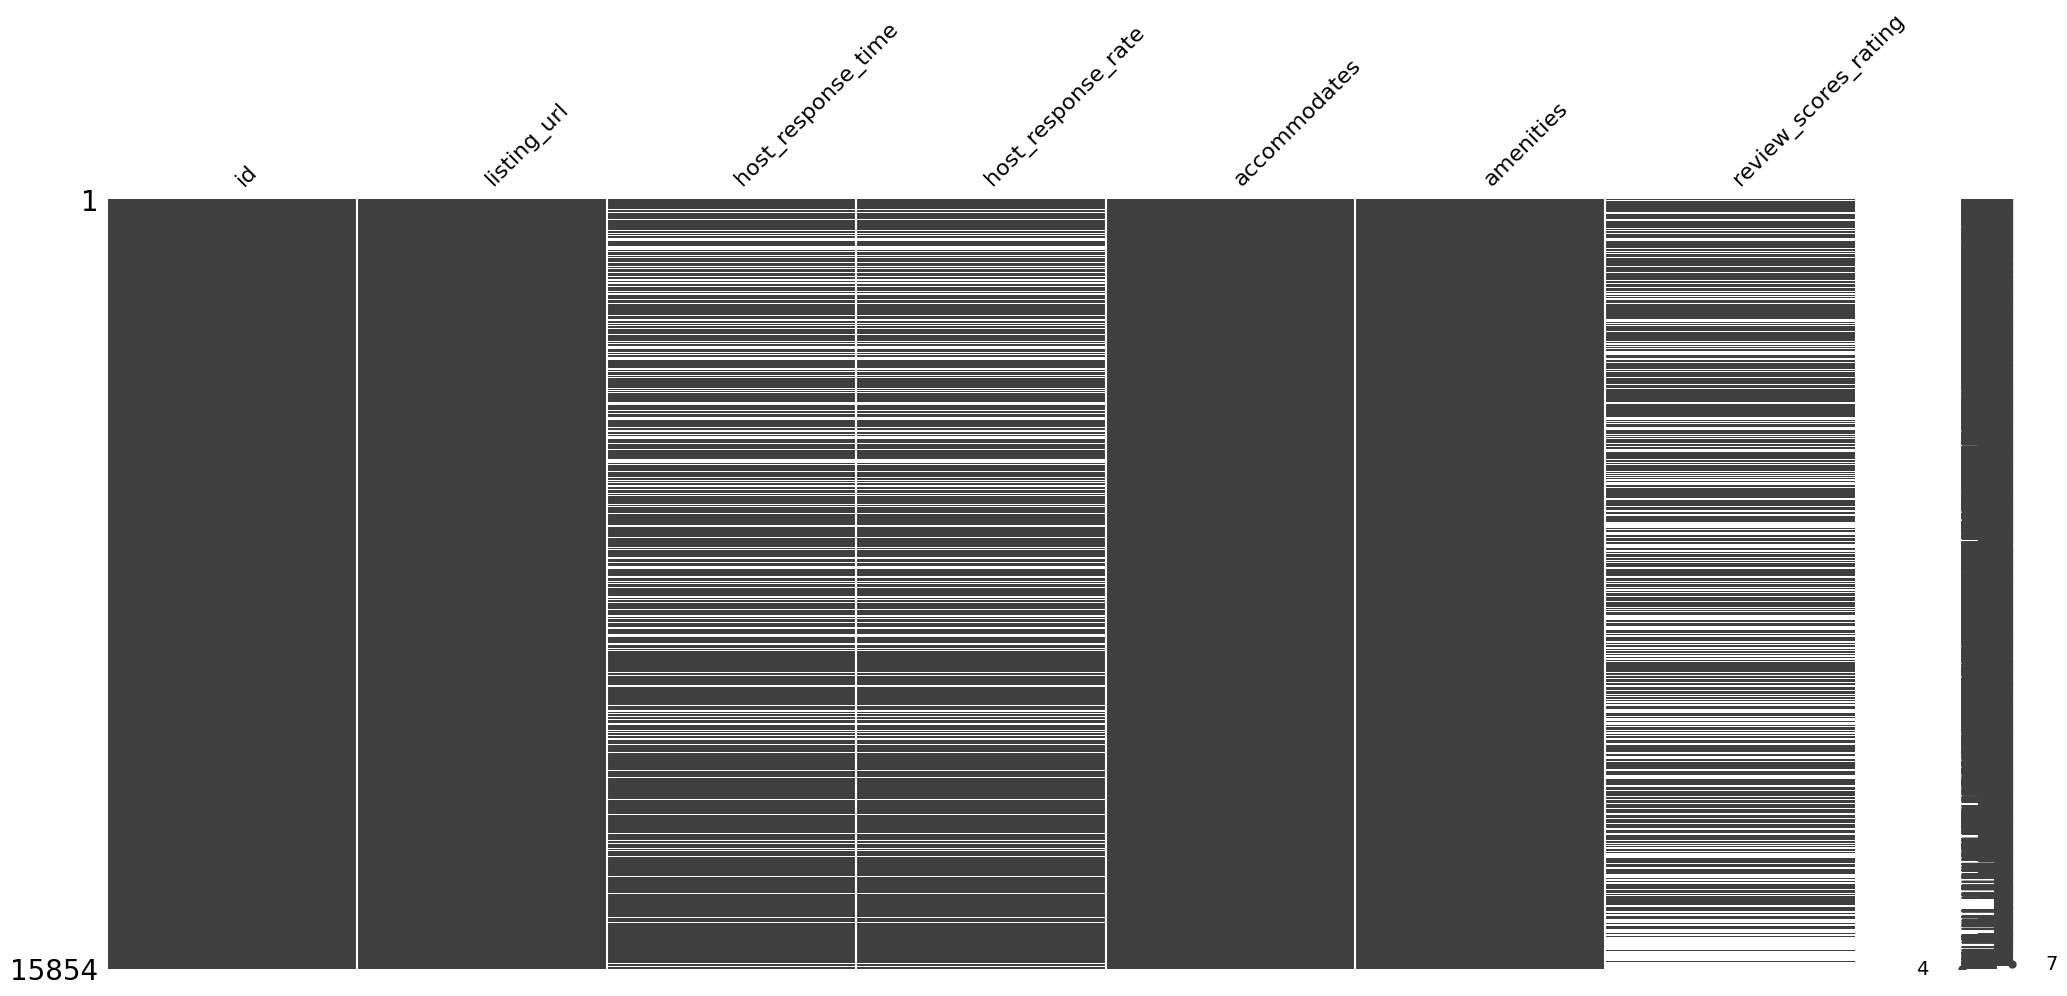

In [9]:
# check sebaran missing values

mno.matrix(bnb_filt)

After checking, it can be seen that the missing values **host_response_time** and **host_response_rate** have the same distribution, so it can be concluded that there is a relationship between the 2 columns. The assumption is that the listing has never been contacted by a potential guest, so it does not have **host_response_time** and **host_response_rate** data. Therefore, the handling of missing values is:
* **host_response_time** : fill with 'no information'
* **host_response_rate** : keep it null

In [10]:
# isi nan value pada host_response_time dengan no information

bnb_filt['host_response_time'].fillna('no information', inplace=True)

### Data Type

**host_response_rate** should be numerical data type 

In [11]:
# convert data type
bnb_filt.host_response_rate = bnb_filt.host_response_rate.str.strip('%').astype(float).round(0)
bnb_filt.head()

,id,listing_url,host_response_time,host_response_rate,accommodates,amenities,review_scores_rating
0,27934,https://www.airbnb.com/rooms/27934,within an hour,100.0,3,"[""Shampoo"", ""Kitchen"", ""Fire extinguisher"", ""F...",4.85
1,941865,https://www.airbnb.com/rooms/941865,within an hour,100.0,2,"[""Washer"", ""Air conditioning"", ""Breakfast"", ""K...",NaN
2,27979,https://www.airbnb.com/rooms/27979,a few days or more,0.0,2,"[""Pool"", ""Washer"", ""First aid kit"", ""Heating"",...",NaN
3,28745,https://www.airbnb.com/rooms/28745,no information,NaN,2,"[""Long term stays allowed""]",NaN
4,35780,https://www.airbnb.com/rooms/35780,within an hour,100.0,2,"[""Clothing storage: closet and dresser"", ""Blen...",4.50


### Feature Engineering

Using domain knowledge we can divide accomodation into 2 different group:
- *family* : accomodates > 2
- *single/couple* : accomodates <= 2

In [12]:
def converAcm(x):
    if x > 2:
        return 'family'
    else:
        return 'single/couple'

bnb_filt['accommodates_type'] = bnb_filt['accommodates'].apply(lambda x: converAcm(x))

In [13]:
bnb_filt.head()

,id,listing_url,host_response_time,host_response_rate,accommodates,amenities,review_scores_rating,accommodates_type
0,27934,https://www.airbnb.com/rooms/27934,within an hour,100.0,3,"[""Shampoo"", ""Kitchen"", ""Fire extinguisher"", ""F...",4.85,family
1,941865,https://www.airbnb.com/rooms/941865,within an hour,100.0,2,"[""Washer"", ""Air conditioning"", ""Breakfast"", ""K...",NaN,single/couple
2,27979,https://www.airbnb.com/rooms/27979,a few days or more,0.0,2,"[""Pool"", ""Washer"", ""First aid kit"", ""Heating"",...",NaN,single/couple
3,28745,https://www.airbnb.com/rooms/28745,no information,NaN,2,"[""Long term stays allowed""]",NaN,single/couple
4,35780,https://www.airbnb.com/rooms/35780,within an hour,100.0,2,"[""Clothing storage: closet and dresser"", ""Blen...",4.50,single/couple


### Save Clean Data

In [14]:
bnb_filt.to_csv('./data/raw/additional_data.csv', index=False)